In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from matplotlib.widgets import Button

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tools
import math_functions as mf

def add_switch_button(ax, fig):
    class Index(object):
        log = False

        def switch(self, event):
            self.log = not self.log
            if self.log:
                ax.set_yscale('log')
            else:
                ax.set_yscale('linear')
            fig.canvas.draw_idle()

    callback = Index()
    axbutton = plt.axes([0.81, 0.05, 0.1, 0.075])
    button = Button(axbutton, 'Switch Scale')
    button.on_clicked(callback.switch)

C:\Users\Orlando\AppData\Local\Temp\ipykernel_49452\1752058890.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


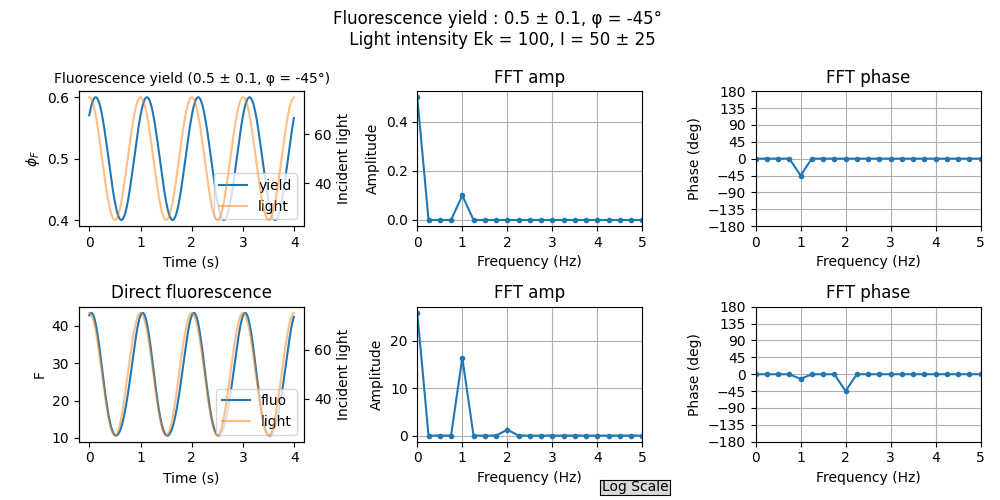

In [55]:
### Constants ###

Ek = 100 # Exponetial saturation constant for photochemistry

### Actinic light parameters ###

offset_fact = 0.5 # fraction of Ek 
amplitude_fact = 0.25 # fraction of Ik

frequency = 1 # Frequency of light modulation in Hz

### Simulation parameters ###

nb_periods = 4 # Number of periods to simulate
points_per_period = 100 # Number of points per period

### Yield of fluorescence parameters ###

avg_yield = 0.5
amplitude_yield = 0.1
phase_shift_yield = -45 #degrees
phase_shift_rad = phase_shift_yield*np.pi/180

### simulate ###

t = np.linspace(0, nb_periods/frequency, nb_periods * points_per_period, endpoint=False) # Time vector
I = offset_fact * Ek + amplitude_fact * Ek * np.cos(2 * np.pi * frequency * t) # Irradiance vector

phi_F = avg_yield + amplitude_yield * np.cos(2* np.pi * (frequency * t) + phase_shift_rad)
F = phi_F*I

### plot ###

fig, ax = plt.subplots(2, 3, figsize=(10, 5))

fig.suptitle(f'Fluorescence yield : {avg_yield} ± {amplitude_yield}, φ = {phase_shift_yield}° \n Light intensity Ek = {Ek}, I = {offset_fact * Ek:.0f} ± {amplitude_fact * Ek:.0f}')

end_freq = 5

ax[0, 0].plot(t, phi_F, label = "yield")
ax[0, 0].plot([], [], color = 'C1', alpha = 0.5, label = 'light' )
ax[0, 0].set(xlabel='Time (s)', ylabel='$\phi_F$')
ax[0, 0].set_title(f'Fluorescence yield ({avg_yield} ± {amplitude_yield}, φ = {phase_shift_yield}°)', fontsize = 10)
ax[0, 0].legend(loc = "lower right")
ax1 = ax[0, 0].twinx()
ax1.plot(t, I, color = 'C1', alpha = 0.5, label = 'light')
ax1.set_ylabel('Incident light')

fft_freq, fft_amp, fft_phase = tools.FFT(t, phi_F)
fft_phase[fft_amp<max(fft_amp[1:])/100] = 0

ax[0, 1].plot(fft_freq, fft_amp, '.-')
ax[0, 1].set(xlabel='Frequency (Hz)', ylabel='Amplitude')
ax[0, 1].set_title('FFT amp')
ax[0, 1].set_xlim(0, end_freq*frequency)
ax[0, 1].grid()

ax[0, 2].plot(fft_freq, fft_phase, '.-')
ax[0, 2].set(xlabel = 'Frequency (Hz)', ylabel = 'Phase (deg)')
ax[0, 2].set_title('FFT phase')
ax[0, 2].set_xlim(0, end_freq*frequency)
ax[0, 2].set_ylim(-180 , 180)

# Set x and y tick intervals
ax[0, 2].set_yticks(np.arange(-180, 180 + 45, 45))  # Set y ticks every 20 units
ax[0, 2].grid()

ax[1, 0].plot(t, F, label = "fluo")
ax[1, 0].plot([], [], color = 'C1', alpha = 0.5, label = 'light' )
ax[1, 0].set(xlabel='Time (s)', ylabel='F')
ax[1, 0].set_title('Direct fluorescence')
ax[1, 0].legend(loc = "lower right")
ax2 = ax[1, 0].twinx()
ax2.plot(t, I, color = 'C1', alpha = 0.5, label = 'light')
ax2.set_ylabel('Incident light')

fft_freq, fft_amp, fft_phase = tools.FFT(t, F)
fft_phase[fft_amp<max(fft_amp[1:])/100] = 0

ax[1, 1].plot(fft_freq, fft_amp, '.-')
ax[1, 1].set(xlabel='Frequency (Hz)', ylabel='Amplitude')
ax[1, 1].set_title('FFT amp')
ax[1, 1].set_xlim(0, end_freq*frequency)
ax[1,1].grid()

ax[1, 2].plot(fft_freq, fft_phase, '.-')
ax[1, 2].set(xlabel = 'Frequency (Hz)', ylabel = 'Phase (deg)')
ax[1, 2].set_title('FFT phase')
ax[1, 2].set_xlim(0, end_freq*frequency)
ax[1, 2].set_ylim(-180 , 180)

# Set x and y tick intervals
ax[1, 2].set_yticks(np.arange(-180, 180 + 45, 45))  # Set y ticks every 20 units
ax[1, 2].grid()

class Index(object):
    log = False

    def switch(self, event):
        self.log = not self.log
        if self.log:
            ax[0, 1].set_yscale('log')
            ax[1, 1].set_yscale('log')
            
        else:
            ax[0, 1].set_yscale('linear')
            ax[1, 1].set_yscale('linear')
        plt.draw()

callback = Index()
axbutton = plt.axes([0.6, 0.01, 0.07, 0.03])
button = Button(axbutton, 'Log Scale')
button.on_clicked(callback.switch)


fig.tight_layout()

folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Apresentaçoes/"
fig.savefig(folder + f"direct_fluo_{avg_yield}_{amplitude_yield}_{phase_shift_yield}.png")


C:\Users\Orlando\AppData\Local\Temp\ipykernel_49452\1196039609.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


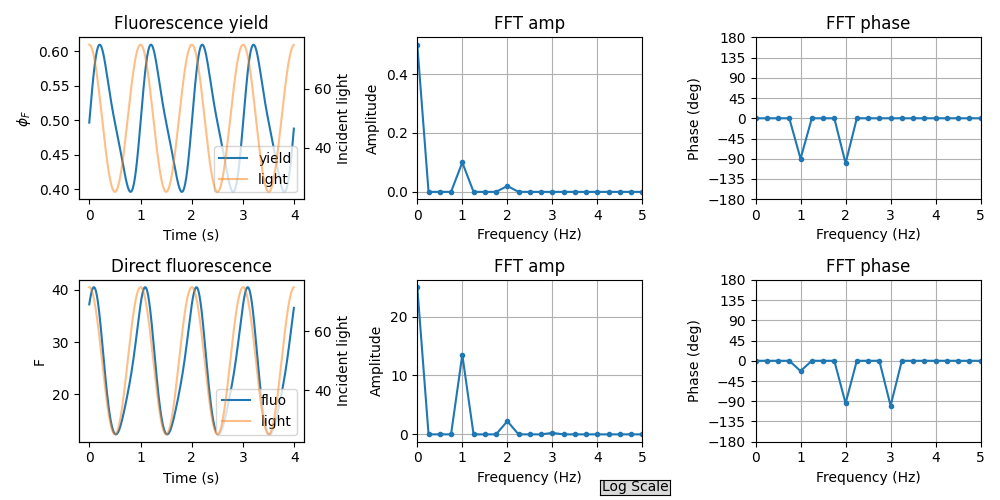

In [54]:
### Constants ###

Ek = 100 # Exponetial saturation constant for photochemistry

### Actinic light parameters ###

offset_fact = 0.5 # fraction of Ek 
amplitude_fact = 0.25 # fraction of Ik

frequency = 1 # Frequency of light modulation in Hz

### Simulation parameters ###

nb_periods = 4 # Number of periods to simulate
points_per_period = 100 # Number of points per period

### Yield of fluorescence parameters ###

avg_yield = 0.5
amplitude_yield = 0.1
phase_shift_yield = -90 #degrees
phase_shift_rad = phase_shift_yield*np.pi/180

first_harm_amp = 0.2 # percentage
first_harm_phase = -10 # degrees with respect to the first harmonic
first_harm_phase_rad = phase_shift_rad + first_harm_phase*np.pi/180 

### simulate ###

t = np.linspace(0, nb_periods/frequency, nb_periods * points_per_period, endpoint=False) # Time vector
I = offset_fact * Ek + amplitude_fact * Ek * np.cos(2 * np.pi * frequency * t) # Irradiance vector

phi_F = avg_yield + amplitude_yield * np.cos(2* np.pi * (frequency * t) + phase_shift_rad) + amplitude_yield * first_harm_amp * np.cos(2* np.pi * (2*frequency * t) + first_harm_phase_rad)
F = phi_F*I

### plot ###

fig, ax = plt.subplots(2, 3, figsize=(10, 5))

end_freq = 5

ax[0, 0].plot(t, phi_F, label = "yield")
ax[0, 0].plot([], [], color = 'C1', alpha = 0.5, label = 'light' )
ax[0, 0].set(xlabel='Time (s)', ylabel='$\phi_F$')
ax[0, 0].set_title(f'Fluorescence yield')
ax[0, 0].legend(loc = "lower right")
ax1 = ax[0, 0].twinx()
ax1.plot(t, I, color = 'C1', alpha = 0.5, label = 'light')
ax1.set_ylabel('Incident light')

fft_freq, fft_amp, fft_phase = tools.FFT(t, phi_F)
fft_phase[fft_amp<max(fft_amp[1:])/100] = 0

ax[0, 1].plot(fft_freq, fft_amp, '.-')
ax[0, 1].set(xlabel='Frequency (Hz)', ylabel='Amplitude')
ax[0, 1].set_title('FFT amp')
ax[0, 1].set_xlim(0, end_freq*frequency)
ax[0, 1].grid()

ax[0, 2].plot(fft_freq, fft_phase, '.-')
ax[0, 2].set(xlabel = 'Frequency (Hz)', ylabel = 'Phase (deg)')
ax[0, 2].set_title('FFT phase')
ax[0, 2].set_xlim(0, end_freq*frequency)
ax[0, 2].set_ylim(-180 , 180)

# Set x and y tick intervals
ax[0, 2].set_yticks(np.arange(-180, 180 + 45, 45))  # Set y ticks every 20 units
ax[0, 2].grid()

ax[1, 0].plot(t, F, label = "fluo")
ax[1, 0].plot([], [], color = 'C1', alpha = 0.5, label = 'light' )
ax[1, 0].set(xlabel='Time (s)', ylabel='F')
ax[1, 0].set_title('Direct fluorescence')
ax[1, 0].legend(loc = "lower right")
ax2 = ax[1, 0].twinx()
ax2.plot(t, I, color = 'C1', alpha = 0.5, label = 'light')
ax2.set_ylabel('Incident light')

fft_freq, fft_amp, fft_phase = tools.FFT(t, F)
fft_phase[fft_amp<max(fft_amp[1:])/100] = 0

ax[1, 1].plot(fft_freq, fft_amp, '.-')
ax[1, 1].set(xlabel='Frequency (Hz)', ylabel='Amplitude')
ax[1, 1].set_title('FFT amp')
ax[1, 1].set_xlim(0, end_freq*frequency)
ax[1,1].grid()

ax[1, 2].plot(fft_freq, fft_phase, '.-')
ax[1, 2].set(xlabel = 'Frequency (Hz)', ylabel = 'Phase (deg)')
ax[1, 2].set_title('FFT phase')
ax[1, 2].set_xlim(0, end_freq*frequency)
ax[1, 2].set_ylim(-180 , 180)

# Set x and y tick intervals
ax[1, 2].set_yticks(np.arange(-180, 180 + 45, 45))  # Set y ticks every 20 units
ax[1, 2].grid()


class Index(object):
    log = False

    def switch(self, event):
        self.log = not self.log
        if self.log:
            ax[0, 1].set_yscale('log')
            ax[1, 1].set_yscale('log')
            
        else:
            ax[0, 1].set_yscale('linear')
            ax[1, 1].set_yscale('linear')
        plt.draw()

callback = Index()
axbutton = plt.axes([0.6, 0.01, 0.07, 0.03])
button = Button(axbutton, 'Log Scale')
button.on_clicked(callback.switch)

fig.tight_layout()

folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Apresentaçoes/"
fig.savefig(folder + f"direct_fluo_{avg_yield}_{amplitude_yield}_{phase_shift_yield}.png")